In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pymc3 as pm

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
df = pd.read_csv('C:/Users/sriva/OneDrive/Desktop/TU Dortmund/4) WiSe-2023-24/4) Case Studies results/booking.csv')

In [4]:
df.head(3)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled


In [5]:
# Perform random sampling of 10,000 observations
df1 = df.sample(n=10000, random_state=42)  # Use a specific random_state for reproducibility

# Display the resulting DataFrame
print(df1)

      Booking_ID  number of adults  number of children  \
36238   INN36239                 1                   0   
83      INN00084                 2                   0   
23449   INN23450                 1                   0   
14981   INN14982                 1                   0   
18392   INN18393                 2                   0   
...          ...               ...                 ...   
6755    INN06756                 2                   0   
26612   INN26613                 2                   0   
8696    INN08697                 2                   0   
35211   INN35212                 2                   0   
20777   INN20778                 3                   0   

       number of weekend nights  number of week nights  type of meal  \
36238                         0                      1  Not Selected   
83                            1                      4   Meal Plan 1   
23449                         0                      1   Meal Plan 1   
14981          

In [6]:
df1.rename(columns={'Booking_ID':'Booking_ID','number of adults':'number_of_adults', 'number of children':'number_of_children',
                   'number of weekend nights':'number_of_weekend_nights', 'number of week nights':'number_of_week_nights',
                   'type of meal':'type_of_meal','car parking space':'car_parking_space', 'room type':'room_type',
                   'lead time':'lead_time', 'market segment type':'market_segment_type','number of adults':'number_of_adults', 'average price':'average_price','special requests':'special_requests', 
                  'date of reservation':'date_of_reservation','booking status':'booking_status'}, inplace=True)

In [7]:
df1.head(3)

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
36238,INN36239,1,0,0,1,Not Selected,0,Room_Type 1,117,Online,0,0,0,161.10,1,11/10/2018,Canceled
83,INN00084,2,0,1,4,Meal Plan 1,0,Room_Type 4,40,Online,0,0,0,98.82,0,3/14/2018,Not_Canceled
23449,INN23450,1,0,0,1,Meal Plan 1,1,Room_Type 1,7,Corporate,1,0,7,98.00,1,6/22/2018,Not_Canceled


In [8]:
df1.tail(3)

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
8696,INN08697,2,0,0,1,Not Selected,1,Room_Type 1,153,Online,0,0,0,103.5,1,7/29/2018,Canceled
35211,INN35212,2,0,0,1,Meal Plan 1,0,Room_Type 1,43,Offline,0,0,0,85.0,0,10/13/2017,Not_Canceled
20777,INN20778,3,0,0,1,Meal Plan 1,0,Room_Type 1,72,Online,0,0,0,159.3,0,5/13/2018,Canceled


In [9]:
df1.describe

<bound method NDFrame.describe of       Booking_ID  number_of_adults  number_of_children  \
36238   INN36239                 1                   0   
83      INN00084                 2                   0   
23449   INN23450                 1                   0   
14981   INN14982                 1                   0   
18392   INN18393                 2                   0   
...          ...               ...                 ...   
6755    INN06756                 2                   0   
26612   INN26613                 2                   0   
8696    INN08697                 2                   0   
35211   INN35212                 2                   0   
20777   INN20778                 3                   0   

       number_of_weekend_nights  number_of_week_nights  type_of_meal  \
36238                         0                      1  Not Selected   
83                            1                      4   Meal Plan 1   
23449                         0                      

In [11]:
df1.shape

(10000, 17)

In [12]:
df1.columns

Index(['Booking_ID', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P-C', 'P-not-C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status'],
      dtype='object')

In [13]:
df1.isna().sum()

Booking_ID                  0
number_of_adults            0
number_of_children          0
number_of_weekend_nights    0
number_of_week_nights       0
type_of_meal                0
car_parking_space           0
room_type                   0
lead_time                   0
market_segment_type         0
repeated                    0
P-C                         0
P-not-C                     0
average_price               0
special_requests            0
date_of_reservation         0
booking_status              0
dtype: int64

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 36238 to 20777
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                10000 non-null  object 
 1   number_of_adults          10000 non-null  int64  
 2   number_of_children        10000 non-null  int64  
 3   number_of_weekend_nights  10000 non-null  int64  
 4   number_of_week_nights     10000 non-null  int64  
 5   type_of_meal              10000 non-null  object 
 6   car_parking_space         10000 non-null  int64  
 7   room_type                 10000 non-null  object 
 8   lead_time                 10000 non-null  int64  
 9   market_segment_type       10000 non-null  object 
 10  repeated                  10000 non-null  int64  
 11  P-C                       10000 non-null  int64  
 12  P-not-C                   10000 non-null  int64  
 13  average_price             10000 non-null  float64
 14  special

In [15]:
df1['booking_status'].value_counts()
print(df1['booking_status'].value_counts())

booking_status
Not_Canceled    6700
Canceled        3300
Name: count, dtype: int64


In [16]:
df1 = df1.drop(['Booking_ID', 'date_of_reservation'], axis=1)

In [17]:
df1

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,booking_status
36238,1,0,0,1,Not Selected,0,Room_Type 1,117,Online,0,0,0,161.10,1,Canceled
83,2,0,1,4,Meal Plan 1,0,Room_Type 4,40,Online,0,0,0,98.82,0,Not_Canceled
23449,1,0,0,1,Meal Plan 1,1,Room_Type 1,7,Corporate,1,0,7,98.00,1,Not_Canceled
14981,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,Online,0,0,0,1.00,0,Not_Canceled
18392,2,0,1,0,Meal Plan 1,0,Room_Type 1,141,Offline,0,0,0,90.00,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,2,0,0,2,Meal Plan 1,0,Room_Type 1,8,Online,0,0,0,111.35,1,Not_Canceled
26612,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Offline,0,0,0,100.00,0,Canceled
8696,2,0,0,1,Not Selected,1,Room_Type 1,153,Online,0,0,0,103.50,1,Canceled
35211,2,0,0,1,Meal Plan 1,0,Room_Type 1,43,Offline,0,0,0,85.00,0,Not_Canceled


In [18]:
df1 = pd.get_dummies(df1, columns=['type_of_meal', 'room_type', 'market_segment_type'])

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 36238 to 20777
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number_of_adults                   10000 non-null  int64  
 1   number_of_children                 10000 non-null  int64  
 2   number_of_weekend_nights           10000 non-null  int64  
 3   number_of_week_nights              10000 non-null  int64  
 4   car_parking_space                  10000 non-null  int64  
 5   lead_time                          10000 non-null  int64  
 6   repeated                           10000 non-null  int64  
 7   P-C                                10000 non-null  int64  
 8   P-not-C                            10000 non-null  int64  
 9   average_price                      10000 non-null  float64
 10  special_requests                   10000 non-null  int64  
 11  booking_status                     10000 non-null  obje

In [20]:
feature_columns = ['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']
target_column = 'booking_status'

In [21]:
X = df1[feature_columns]
y = df1[target_column]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#X = df1.drop('booking_status', axis=1)  ######need later maybe
#y = df1['booking_status']

In [24]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ######need later maybe

In [25]:
train_data, test_data = train_test_split(df1, test_size=0.2, random_state=42)

In [26]:
X_num = train_data.select_dtypes(include = ['int64', 'float64', 'datetime'])

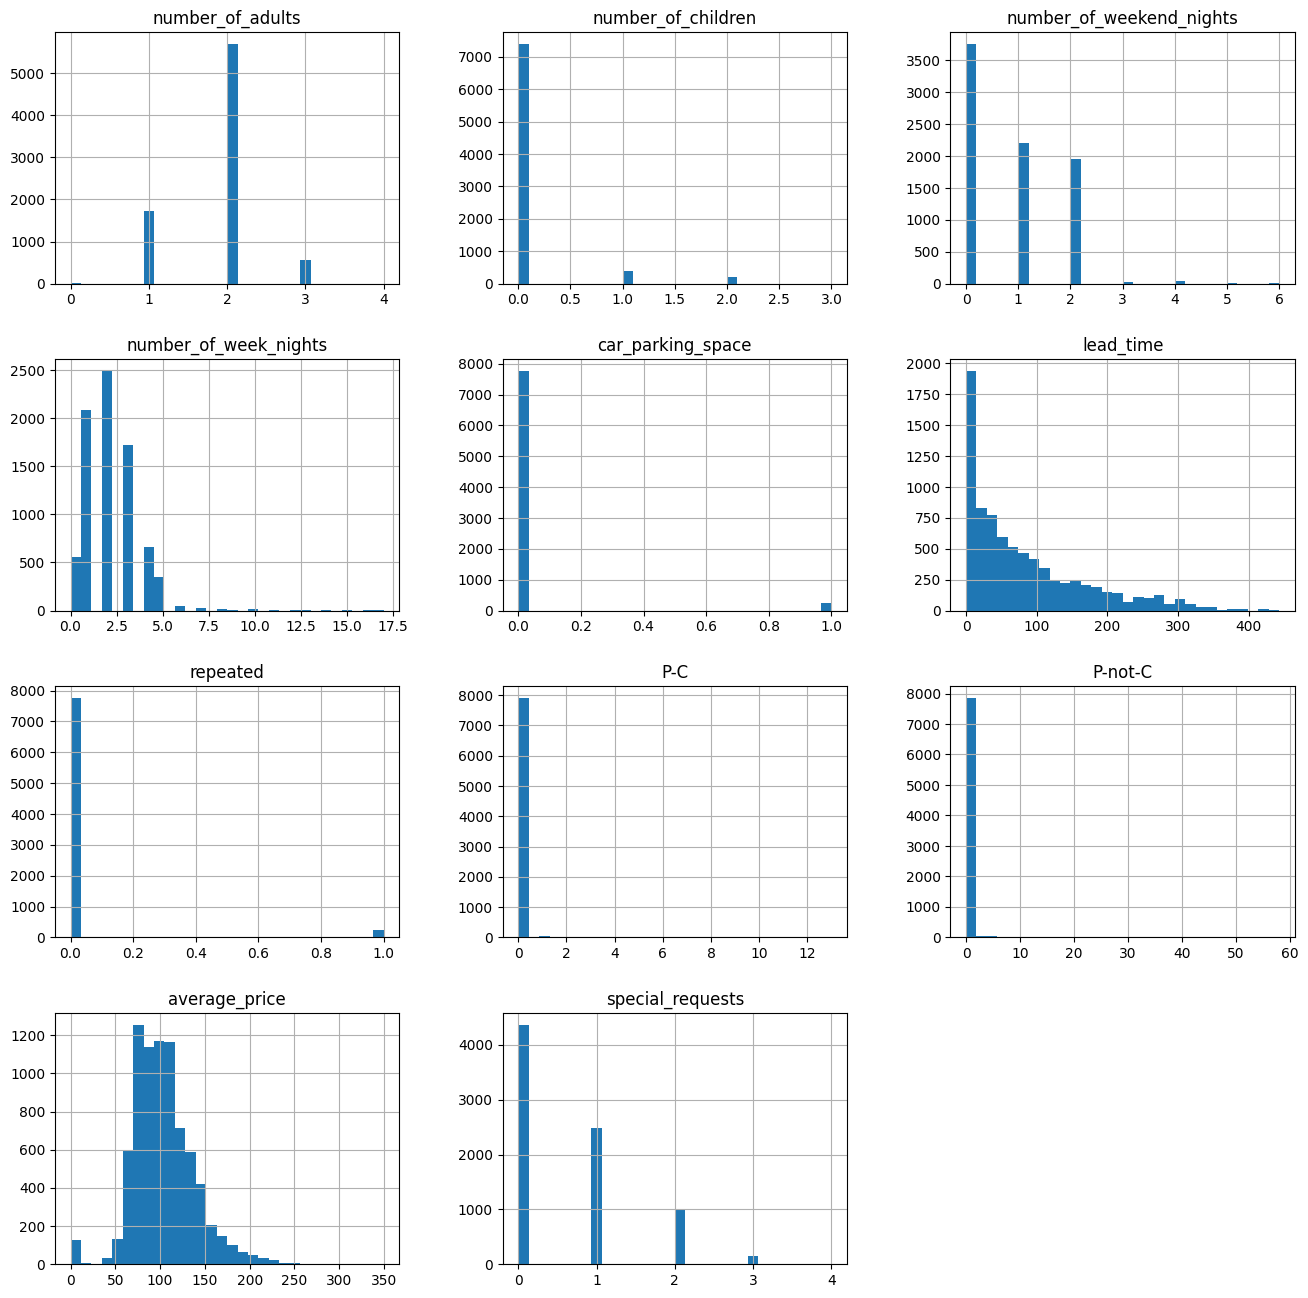

In [27]:
X_num.hist(bins = 30, figsize = (16, 16));
plt.savefig('histogram_plot.png')
plt.show()

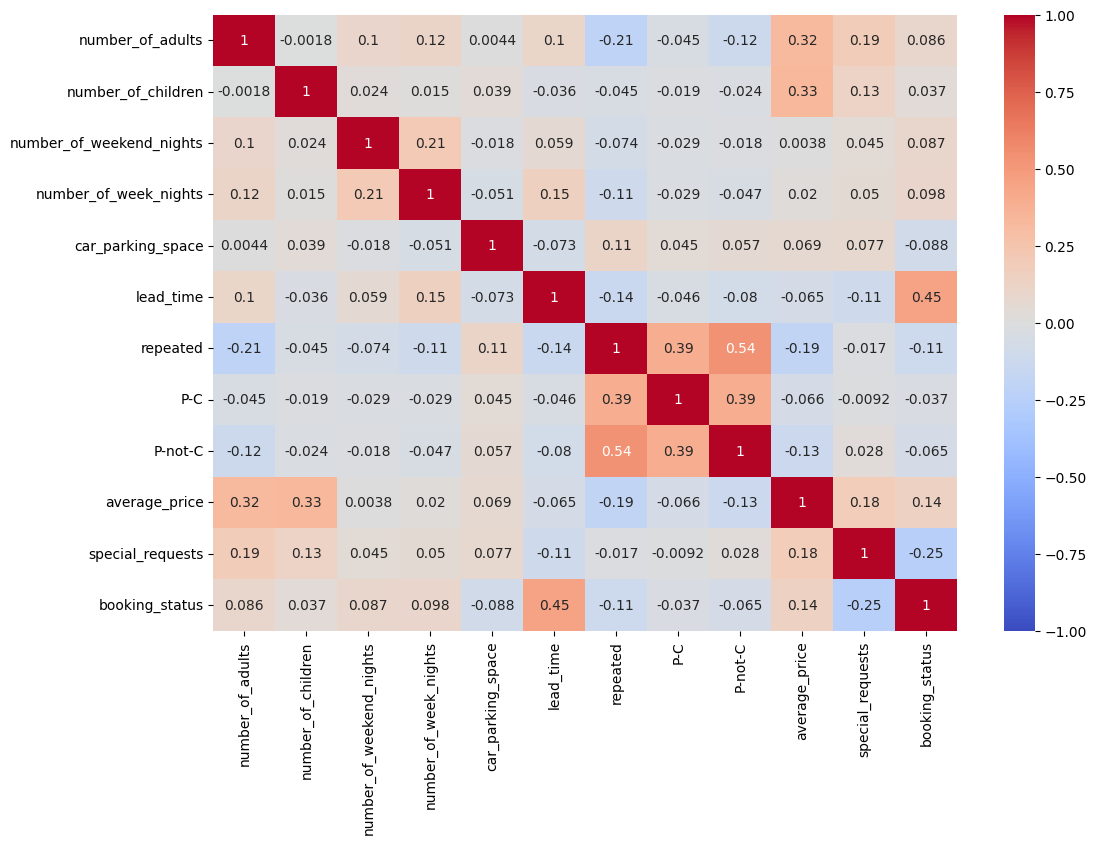

In [28]:
corr = pd.concat([X_num, (y_train == 'Canceled')], axis = 1).corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True);
plt.savefig('correlation.png')

In [29]:
train_data.shape 

(8000, 28)

In [30]:
test_data.shape  

(2000, 28)

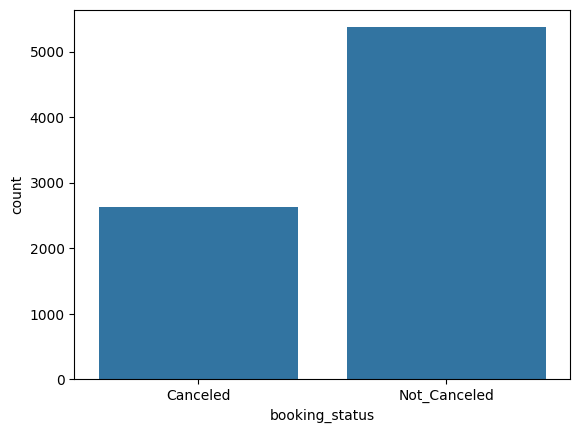

In [31]:
sns.countplot(x = y_train)
plt.savefig('train_data.png')
plt.show()

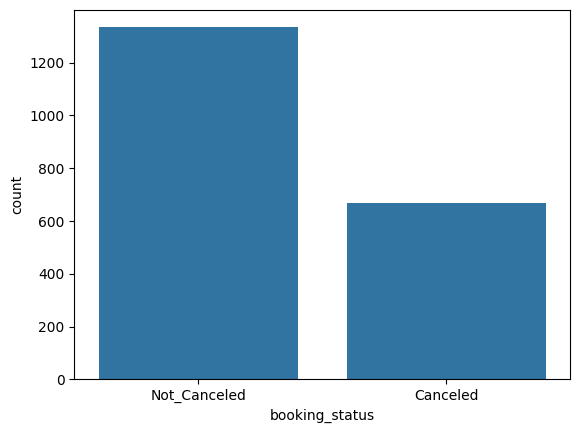

In [32]:
sns.countplot(x = y_test)
plt.savefig('test_data.png')
plt.show()

In [33]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

lead_time                   0.440510
average_price               0.301694
special_requests            0.086859
number_of_week_nights       0.074783
number_of_weekend_nights    0.047972
number_of_adults            0.033834
number_of_children          0.014349
dtype: float64


In [35]:
print(df1.columns)

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated',
       'P-C', 'P-not-C', 'average_price', 'special_requests', 'booking_status',
       'type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
       'room_type_Room_Type 1', 'room_type_Room_Type 2',
       'room_type_Room_Type 3', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')


In [36]:
selected_columns_1 = ['lead_time', 'number_of_adults',
                     'number_of_children', 'number_of_weekend_nights',
                     'number_of_week_nights', 'special_requests',
                     'average_price', 'booking_status']
selected_df = df1[selected_columns_1]

c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


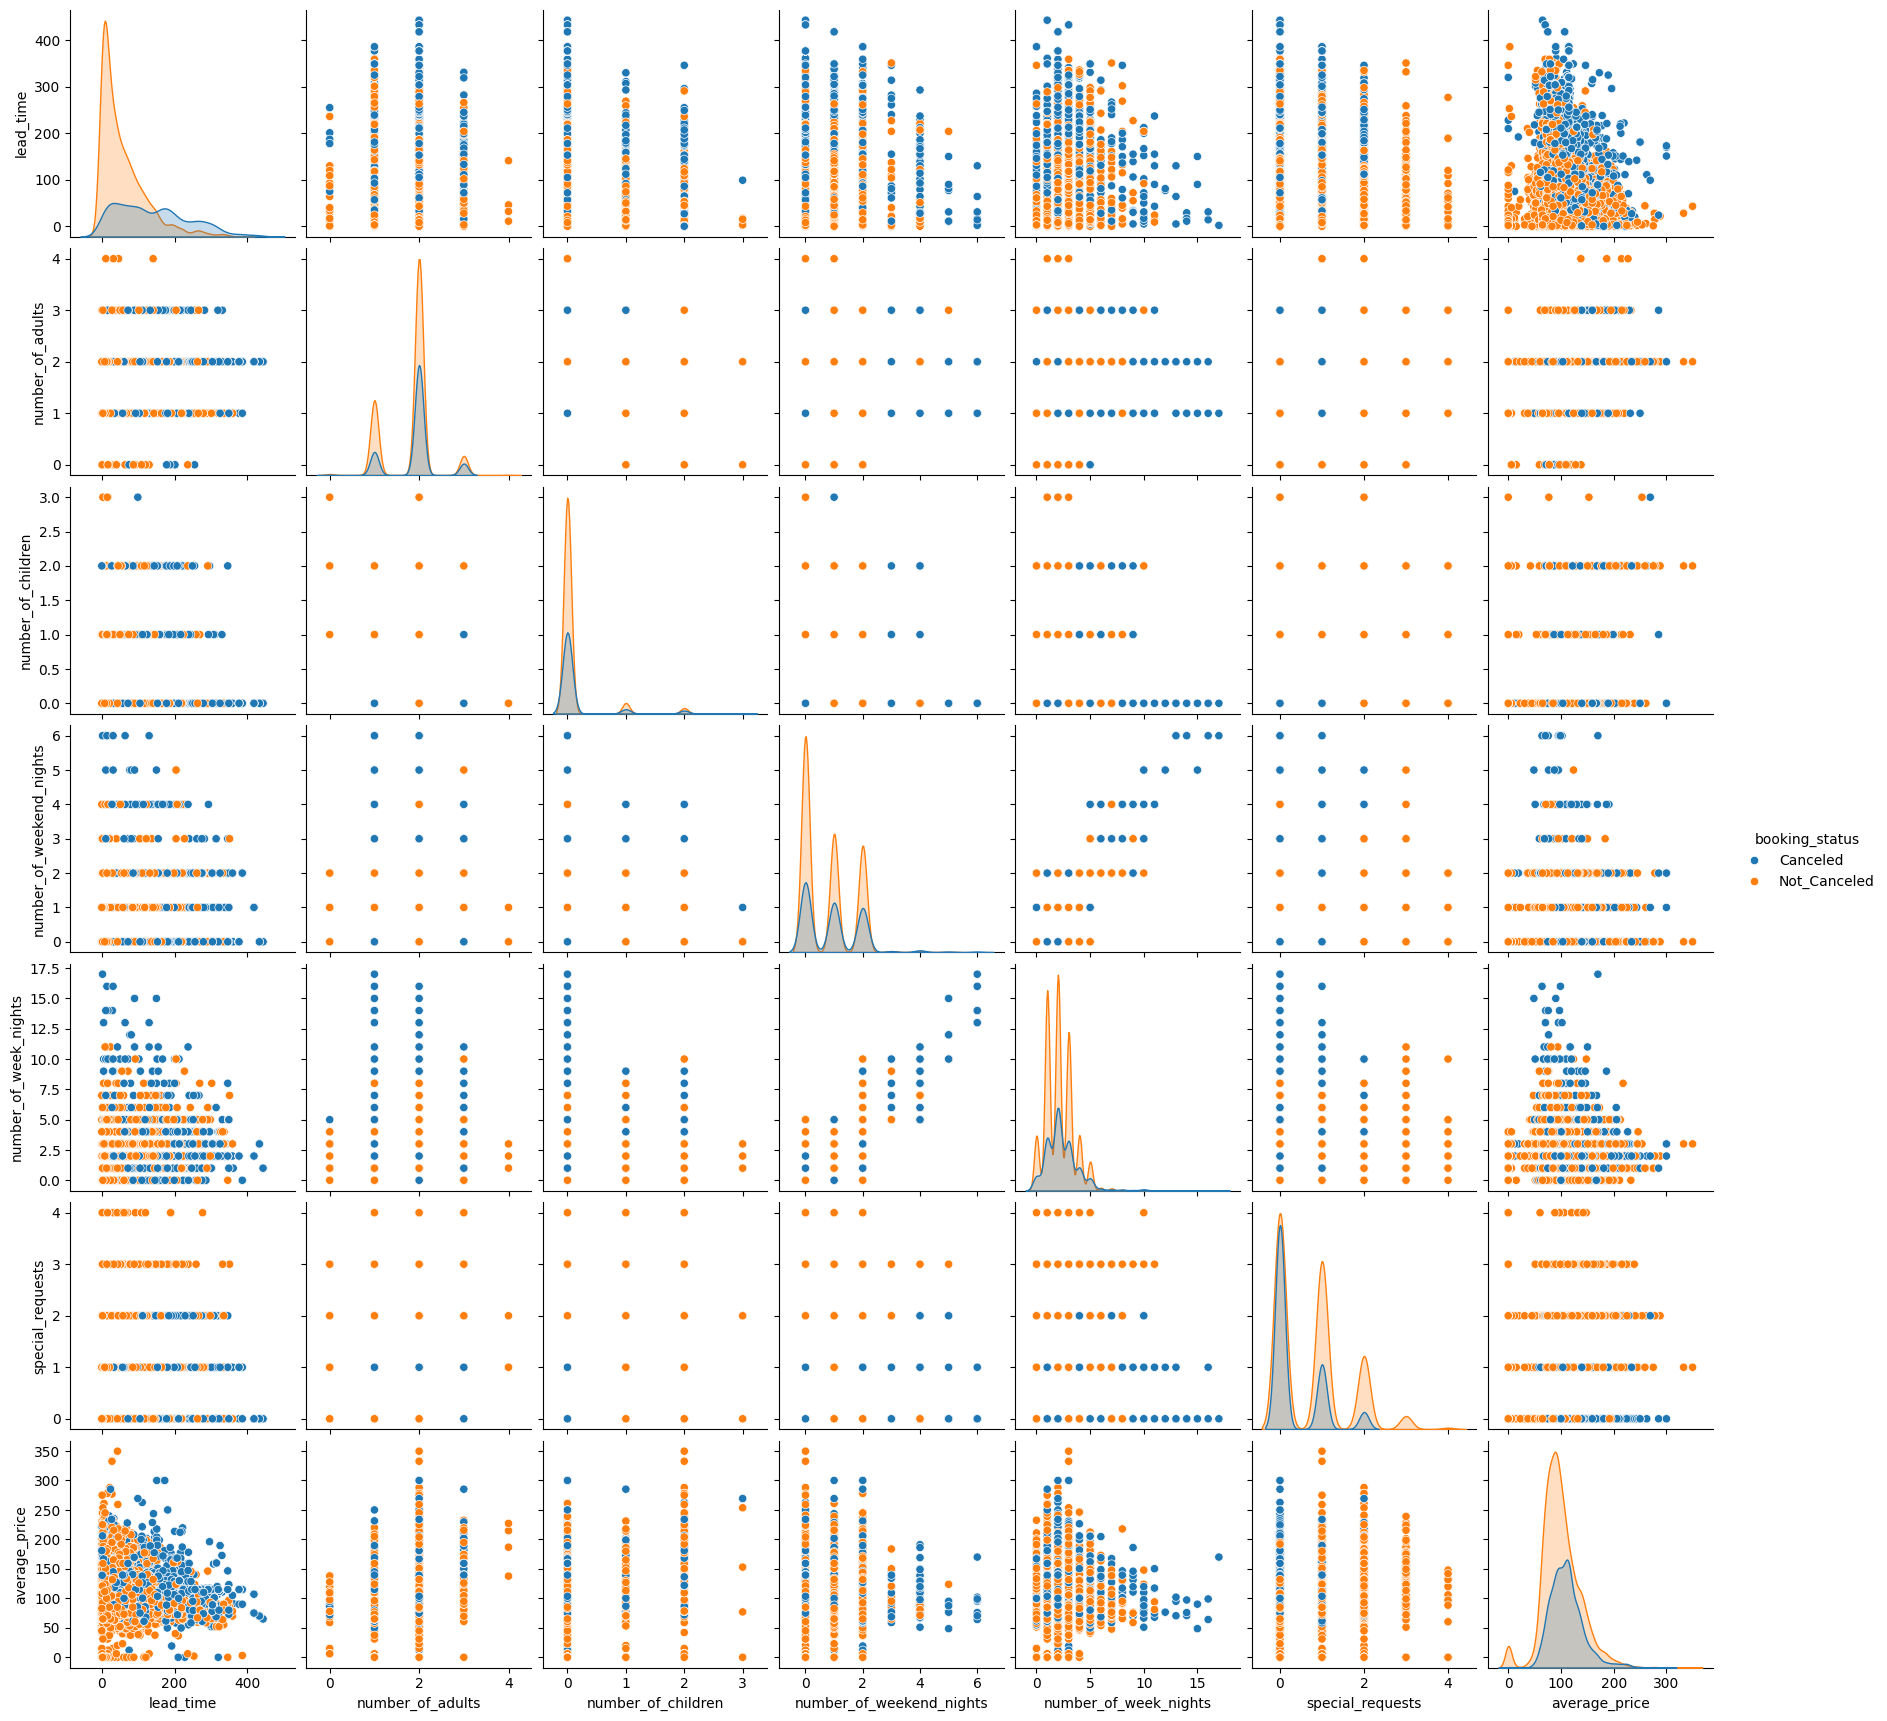

In [37]:
#Pairplot for selected variables
sns.pairplot(selected_df, hue='booking_status', diag_kind='kde')
plt.savefig('Pairplot_for_selected_variables.png')
plt.show()

Focused on: Predictive Booking Model: Implement a Bayesian model that predicts the likelihood of a successful booking based on variables such as lead time, number of adults and children, weekend and week nights, room type, and special requests. Use historical data to train the model and continuously update it to enhance accuracy.

GLM Implement -- Done

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
M

Sampling 4 chains for 10 tune and 100 draw iterations (40 + 400 draws total) took 152 seconds.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for

                           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept                -0.103  0.286  -0.551    0.173      0.137    0.104   
lead_time                 0.371  0.544  -0.332    0.925      0.261    0.198   
number_of_adults          0.330  0.415  -0.309    0.792      0.199    0.151   
number_of_children       -0.391  0.563  -0.958    0.516      0.270    0.206   
number_of_weekend_nights  0.097  0.703  -0.678    0.928      0.337    0.257   
number_of_week_nights     0.294  0.365  -0.117    0.702      0.175    0.133   
special_requests          0.115  0.446  -0.513    0.704      0.214    0.163   
average_price             0.318  0.726  -0.914    0.905      0.348    0.265   
sd                        1.316  0.408   0.759    1.711      0.196    0.149   

                          ess_bulk  ess_tail         r_hat  
Intercept                      4.0       4.0  3.215194e+16  
lead_time                      4.0       4.0  3.215194e+16  
number_of_adults          

c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


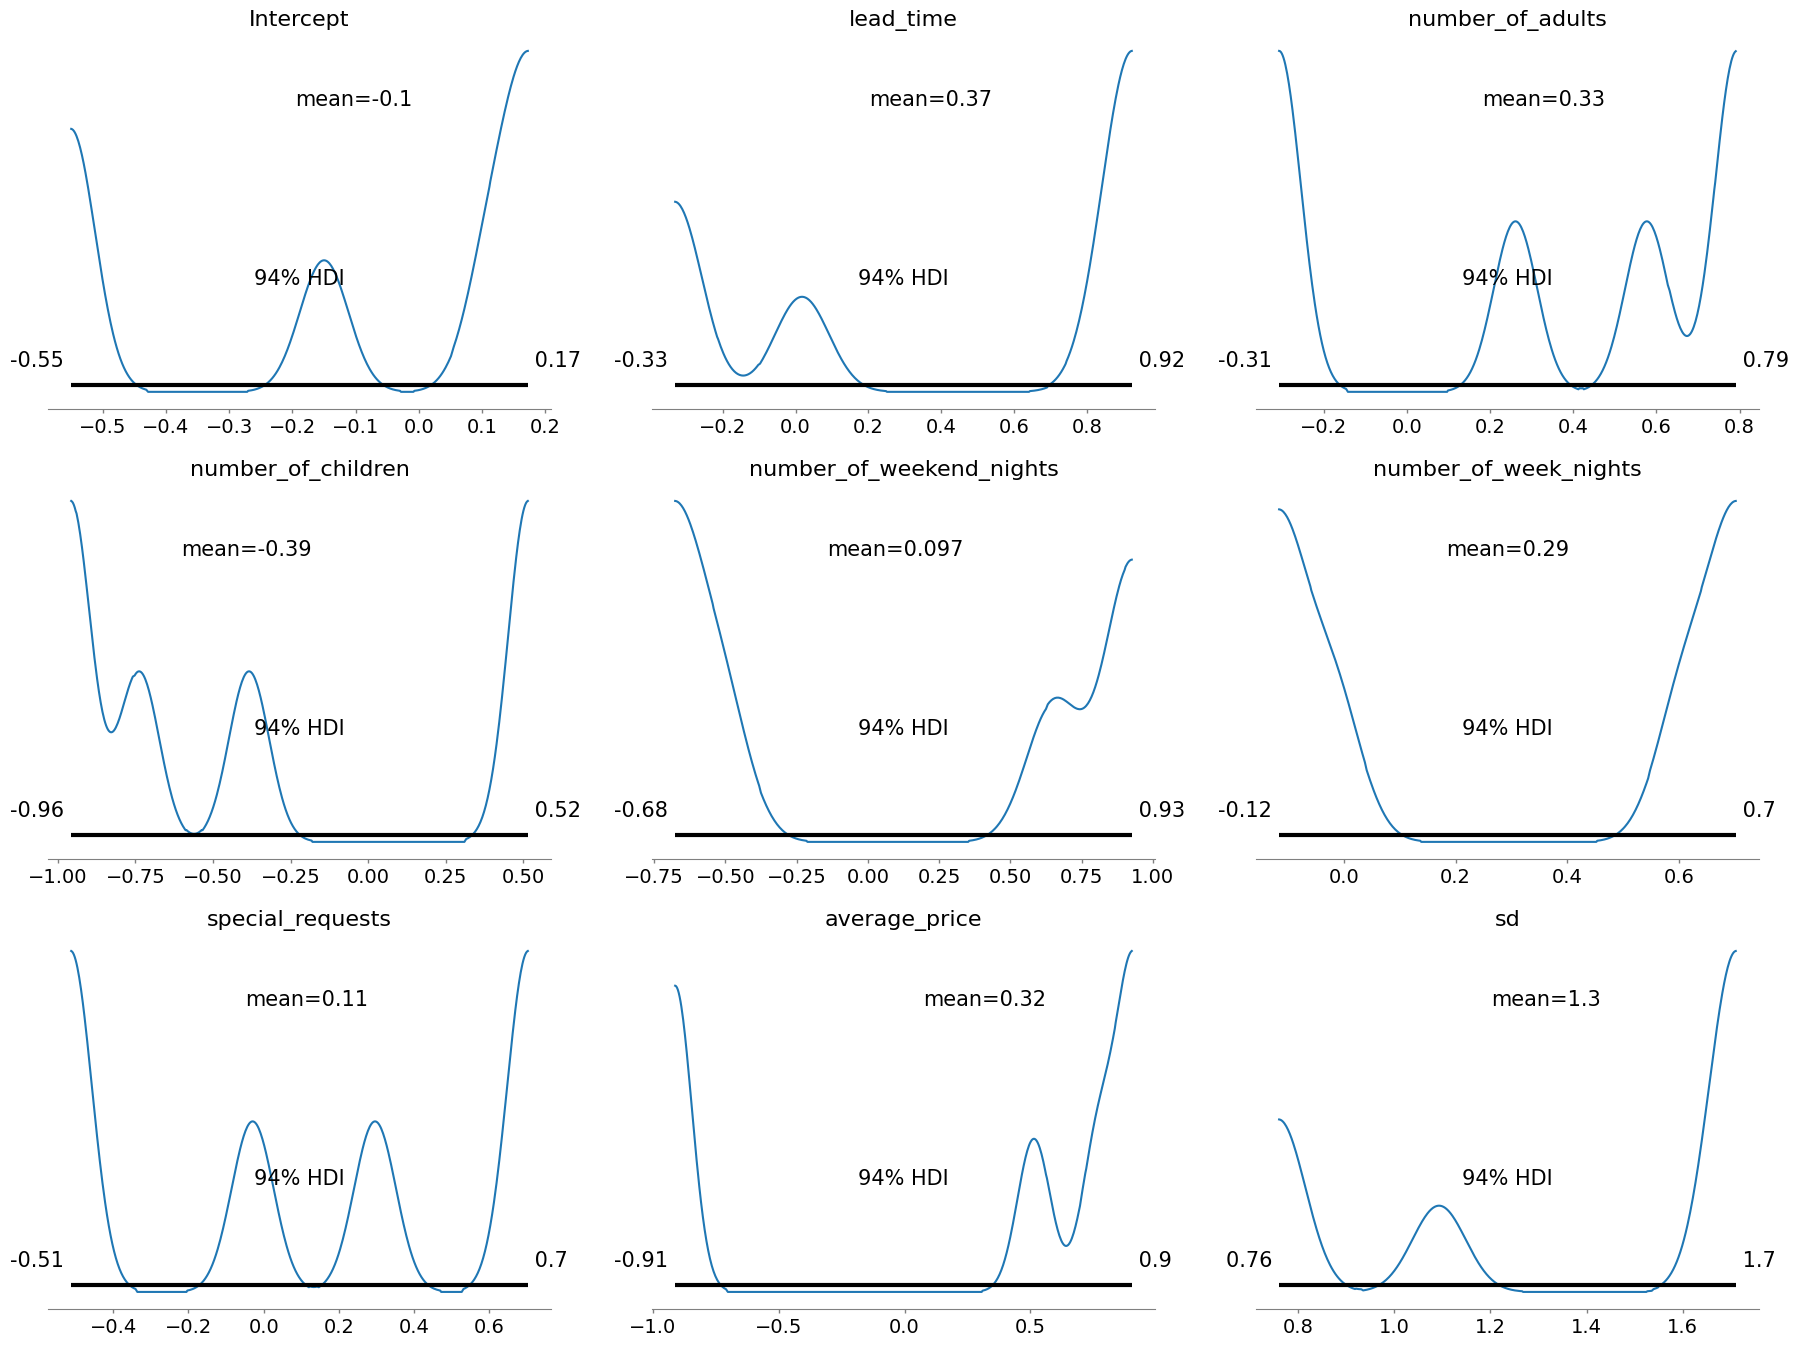

In [38]:
with pm.Model() as bayesian_model:
    pm.glm.GLM.from_formula('booking_status ~ lead_time + number_of_adults + number_of_children + number_of_weekend_nights + number_of_week_nights + special_requests + average_price', train_data)
    trace = pm.sample(100, tune=10)

# Check the summary of the Bayesian model  #average_price is also important. so need to add next training.
print(pm.summary(trace))
pm.plot_posterior(trace)
plt.savefig('summary_GLM.png')
plt.show()

In [39]:
train_X = train_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
train_y = train_data['booking_status']

In [40]:
test_X = test_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
test_y = test_data['booking_status']

In [41]:
with bayesian_model:
    post_pred_train = pm.sample_posterior_predictive(trace, samples=10)

c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [42]:
# Assuming you have the trained model from the previous step
with bayesian_model:
    post_pred = pm.sample_posterior_predictive(trace, samples=10)

In [43]:
train_y_int_labels = train_y.map({'Canceled': 1, 'Not_Canceled': 0})
from sklearn.metrics import accuracy_score, classification_report

predicted_labels_train = (post_pred_train['y'].mean(axis=0) > 0.5).astype(int)
predicted_labels_train = predicted_labels_train[:len(train_y)]

# Calculate accuracy with integer labels for the training set
accuracy_train = accuracy_score(train_y_int_labels, predicted_labels_train)
print(f'Accuracy on training set: {accuracy_train}')

# Print classification report with integer labels for the training set
print(classification_report(train_y_int_labels, predicted_labels_train))


Accuracy on training set: 0.28975
              precision    recall  f1-score   support

           0       0.39      0.11      0.17      5367
           1       0.27      0.66      0.38      2633

    accuracy                           0.29      8000
   macro avg       0.33      0.38      0.27      8000
weighted avg       0.35      0.29      0.24      8000



In [44]:
test_y_int_labels = test_y.map({'Canceled': 1, 'Not_Canceled': 0})
from sklearn.metrics import accuracy_score, classification_report

predicted_labels = (post_pred['y'].mean(axis=0) > 0.5).astype(int)
predicted_labels = predicted_labels[:len(test_y)]

# Calculate accuracy with integer labels
accuracy = accuracy_score(test_y_int_labels, predicted_labels)
print(f'Accuracy on test set: {accuracy}')

# Print classification report with integer labels
print(classification_report(test_y_int_labels, predicted_labels))

Accuracy on test set: 0.396
              precision    recall  f1-score   support

           0       0.68      0.18      0.29      1333
           1       0.34      0.83      0.48       667

    accuracy                           0.40      2000
   macro avg       0.51      0.50      0.38      2000
weighted avg       0.56      0.40      0.35      2000



In [45]:
# List all variable names in the trace
print(trace.varnames)

['Intercept', 'lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price', 'sd_log__', 'sd']


The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
M

Sampling 4 chains for 10 tune and 100 draw iterations (40 + 400 draws total) took 217 seconds.
There were 35 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 1.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
There were 42 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 1.0, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger th

                           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept                 0.321  0.417  -0.235    0.930      0.200    0.152   
lead_time                -0.144  0.613  -0.934    0.483      0.294    0.224   
number_of_adults         -0.412  0.491  -0.863    0.416      0.235    0.179   
number_of_children       -0.434  0.400  -0.889    0.117      0.192    0.146   
number_of_weekend_nights -0.013  0.644  -0.778    0.996      0.309    0.235   
number_of_week_nights     0.046  0.335  -0.409    0.537      0.161    0.122   
special_requests         -0.081  0.675  -0.920    0.724      0.324    0.246   
average_price             0.057  0.677  -0.937    0.813      0.325    0.247   
sd                        1.286  0.585   0.604    2.286      0.280    0.213   

                          ess_bulk  ess_tail  r_hat  
Intercept                      4.0       4.0  13.17  
lead_time                      5.0       4.0   4.02  
number_of_adults               4.0      12.0   

c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


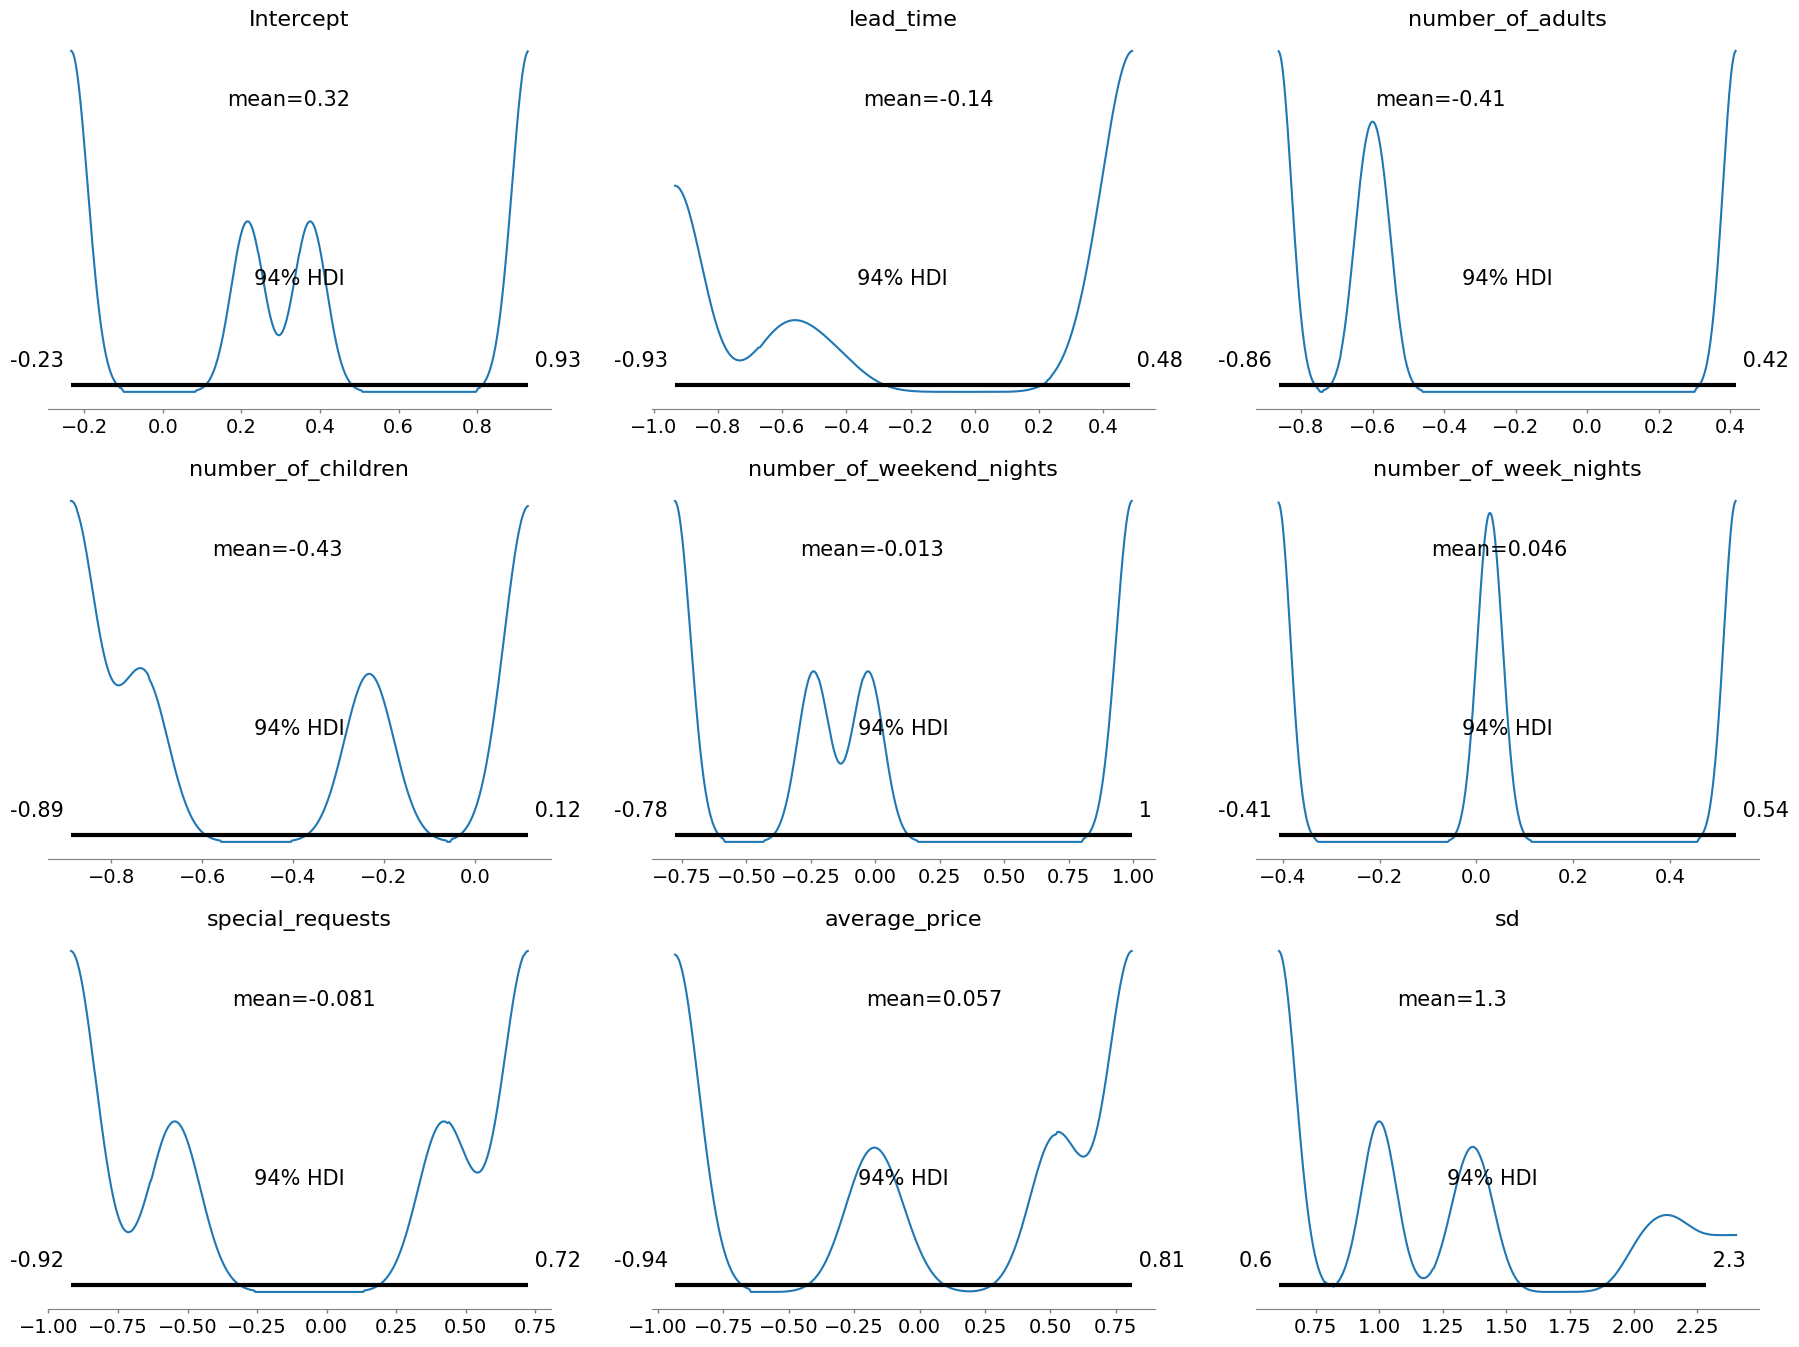

In [46]:
with pm.Model() as bayesian_model:
    pm.glm.GLM.from_formula('booking_status ~ lead_time + number_of_adults + number_of_children + number_of_weekend_nights + number_of_week_nights + special_requests + average_price', train_data)
    trace = pm.sample(100, tune=10)

# Check the summary of the Bayesian model  #average_price is also important. so need to add next training.
print(pm.summary(trace))
pm.plot_posterior(trace)
plt.savefig('summary_GLM.png')
plt.show()

Binomial-Beta Model - Testing error

c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 50 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\theano\scalar\basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\theano\scalar\basic.py:3133: RuntimeWarning: overflow encountered in expm1
  return np.expm1(x)
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


Sampling 2 chains for 7 tune and 50 draw iterations (14 + 100 draws total) took 63 seconds.
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
Got error No model on context stack. trying to find log_likelihood in translation.
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3

    mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
p  0.553  0.11   0.443    0.662      0.073     0.06       2.0       2.0    inf
Probability that 'p' is greater than 0.5: 50.00%


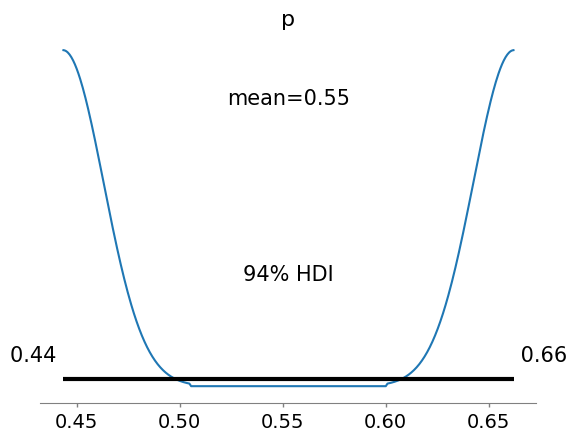

In [47]:
import pymc3 as pm
import pandas as pd
import arviz as az
from scipy.stats import percentileofscore

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df1['booking_status'] = (df1['booking_status'] == 'Canceled').astype(int)

with pm.Model() as binomial_beta_model:
    # Prior for the probability parameter (Beta distribution)
    p = pm.Beta('p', alpha=2, beta=2)
    
    # Likelihood (Binomial distribution)
    likelihood = pm.Binomial('likelihood', n=len(df1['booking_status']), p=p, observed=df1['booking_status'])
    

    trace = pm.sample(50, tune=7, cores=1)  # Adjust the number of samples and tuning steps as needed


print(pm.summary(trace))


az.plot_posterior(trace, var_names=['p'])
plt.savefig('posterior_plot.png')

# Hypothesis testing

threshold = 0.5
posterior_prob_greater_than_threshold = percentileofscore(trace['p'], threshold)
print(f"Probability that 'p' is greater than {threshold}: {100 - posterior_prob_greater_than_threshold:.2f}%")


In [48]:
train_X = train_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
train_y = train_data['booking_status']

In [49]:
test_X = test_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
test_y = test_data['booking_status']

In [50]:
with binomial_beta_model:
    # Sample from the posterior predictive distribution
    post_pred_train = pm.sample_posterior_predictive(trace, samples=10)


c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [51]:
# Assuming you have the trained model from the previous step
with binomial_beta_model:
    post_pred = pm.sample_posterior_predictive(trace, samples=10)

In [75]:
import numpy as np
from scipy.stats import beta
from sklearn.metrics import accuracy_score, classification_report

# Define some_scaling_factor appropriately
some_scaling_factor = 1.0  # Adjust this based on your model's requirements

# Using 'likelihood' instead of 'y'
predicted_probs = post_pred_train['likelihood'].mean(axis=0)

# Ensure predicted_probs are within (0, 1)
epsilon = 1e-6  # Small value to prevent 0 or 1
predicted_probs = np.clip(predicted_probs, epsilon, 1 - epsilon)

alpha_train = predicted_probs * some_scaling_factor
beta_train = (1 - predicted_probs) * some_scaling_factor

# Ensure all values in alpha_train and beta_train are positive
if np.any(alpha_train <= 0) or np.any(beta_train <= 0):
    raise ValueError("Non-positive values found in alpha_train or beta_train.")

# Sample from the Beta distribution for the training set
sampled_labels_train = np.random.beta(alpha_train[:len(train_y_int_labels)], beta_train[:len(train_y_int_labels)])

# Convert probabilities to binary labels for the training set
predicted_labels_beta_train = (sampled_labels_train > 0.5).astype(int)

# Calculate accuracy with binary labels for the training set
accuracy_train_beta = accuracy_score(train_y_int_labels, predicted_labels_beta_train)
print(f'Accuracy on training set (Binomial-Beta Model): {accuracy_train_beta}')
print(classification_report(train_y_int_labels, predicted_labels_beta_train))


Accuracy on training set (Binomial-Beta Model): 0.329125
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5367
           1       0.33      1.00      0.50      2633

    accuracy                           0.33      8000
   macro avg       0.16      0.50      0.25      8000
weighted avg       0.11      0.33      0.16      8000



c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [76]:
print(f"Length of train_y_int_labels: {len(train_y_int_labels)}")
print(f"Length of predicted_labels_beta_train: {len(predicted_labels_beta_train)}")


Length of train_y_int_labels: 8000
Length of predicted_labels_beta_train: 8000


In [81]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Define some_scaling_factor appropriately
some_scaling_factor = 1.0  # Adjust this based on your model's requirements

# Using the correct key for the posterior predictive distribution
predicted_probabilities = post_pred['likelihood'].mean(axis=0)

# Ensure the size of predicted_probabilities matches the size of the test set
predicted_probabilities = predicted_probabilities[:len(test_y)]

# Ensure predicted_probabilities are within (0, 1)
epsilon = 1e-6  # Small value to prevent 0 or 1
predicted_probabilities = np.clip(predicted_probabilities, epsilon, 1 - epsilon)

alpha = predicted_probabilities * some_scaling_factor
beta_value = (1 - predicted_probabilities) * some_scaling_factor

# Check if alpha and beta_value are valid (all values should be > 0)
if np.any(alpha <= 0) or np.any(beta_value <= 0):
    raise ValueError("Invalid values in alpha or beta_value. Adjust some_scaling_factor or predicted_probabilities.")

# Sample from the Beta distribution for the test set
sampled_labels = np.random.beta(alpha, beta_value, size=len(test_y))

# Convert probabilities to binary labels for the test set
predicted_labels_beta = (sampled_labels > 0.5).astype(int)

# Calculate accuracy with binary labels for the test set
accuracy_beta = accuracy_score(test_y_int_labels, predicted_labels_beta)
print(f'Accuracy on test set (Binomial-Beta Model): {accuracy_beta}')

# Print classification report with binary labels for the test set
print(classification_report(test_y_int_labels, predicted_labels_beta))


Accuracy on test set (Binomial-Beta Model): 0.3335
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1333
           1       0.33      1.00      0.50       667

    accuracy                           0.33      2000
   macro avg       0.17      0.50      0.25      2000
weighted avg       0.11      0.33      0.17      2000



c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Poisson-Gamma Model - - Testing error

c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 5 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rate]


c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


Sampling 2 chains for 5 tune and 5 draw iterations (10 + 10 draws total) took 7 seconds.
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
Got error No model on context stack. trying to find log_likelihood in translation.
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


       mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
rate  0.183  0.197   0.029    0.556      0.073    0.054       7.0       7.0   

      r_hat  
rate    3.0  


c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


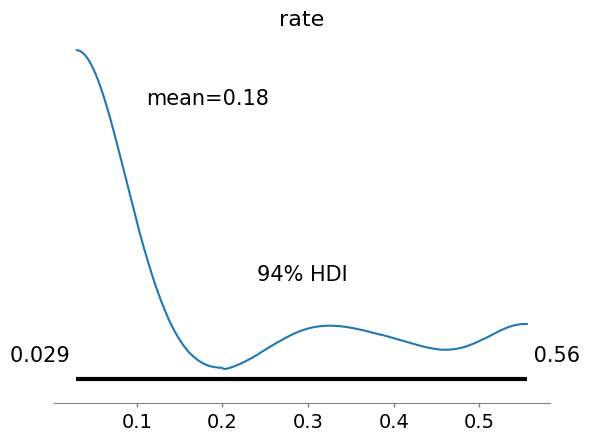

In [82]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df1['booking_status'] = (df1['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the rate parameter (Gamma distribution)
    rate = pm.Gamma('rate', alpha=2, beta=2)
    
    # Poisson likelihood
    likelihood = pm.Poisson('likelihood', mu=rate, observed=df1['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(5, tune=5, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['rate'])
plt.savefig('Poisson-Gamma_Model.png')

In [84]:
with bayesian_model:
    post_pred_test = pm.sample_posterior_predictive(trace, samples=5)

# Convert Poisson counts to binary labels for the test set
predicted_labels_test = (post_pred_test['likelihood'].mean(axis=0) > 0.5).astype(int)

# Ensure the size of predicted_labels_test matches the size of the test set
predicted_labels_test = predicted_labels_test[:len(test_data)]

actual_labels_test = (test_data['booking_status'] == 'Canceled').astype(int)

# Check the lengths
print(f"Length of actual_labels_test: {len(actual_labels_test)}")
print(f"Length of predicted_labels_test: {len(predicted_labels_test)}")

# Ensure both arrays have the same length
if len(actual_labels_test) != len(predicted_labels_test):
    raise ValueError("The number of actual and predicted labels do not match.")

# Calculate accuracy with binary labels for the test set
accuracy_test = accuracy_score(actual_labels_test, predicted_labels_test)
print(f'Accuracy on test set: {accuracy_test}')

# Print classification report with binary labels for the test set
print(classification_report(actual_labels_test, predicted_labels_test))


c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Length of actual_labels_test: 2000
Length of predicted_labels_test: 2000
Accuracy on test set: 0.6655
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1333
           1       0.25      0.00      0.00       667

    accuracy                           0.67      2000
   macro avg       0.46      0.50      0.40      2000
weighted avg       0.53      0.67      0.53      2000



Exponential-Gamma Model - Testing error

c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 5 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rate]


c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: overflow encountered in exp
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\theano\scalar\basic.py:1813: RuntimeWarning: invalid value encountered in double_scalars
  return sum(inputs)


Sampling 2 chains for 5 tune and 5 draw iterations (10 + 10 draws total) took 0 seconds.
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4, but should be close to 0.8. Try to increase the number of tuning steps.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
Got error No model on context stack. trying to find log_likelihood in translation.
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. M

         mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
rate  331.243  371.91   2.895  755.393    138.365  102.085       7.0   

      ess_tail  r_hat  
rate       7.0   2.71  


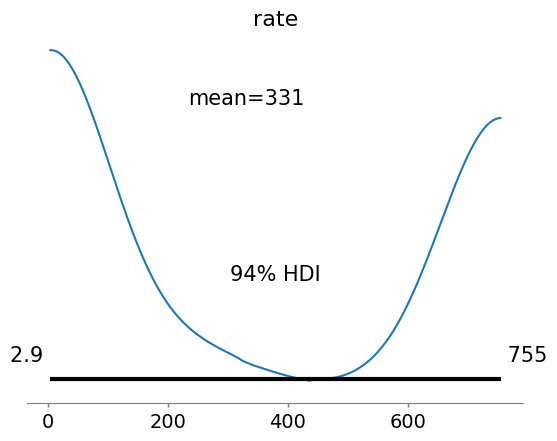

In [85]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df1['booking_status'] = (df1['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the rate parameter (Gamma distribution)
    rate = pm.Gamma('rate', alpha=2, beta=2)
    
    # Exponential likelihood
    likelihood = pm.Exponential('likelihood', lam=rate, observed=df1['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(5, tune=5, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['rate'])
plt.savefig('Exponential-Gamma_Model.png')

c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Got error No model on context stack. trying to find log_likelihood in translation.
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
posterior predictive variable likelihood's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable test_likelihood's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
c:\users\sriva\appdata\local\programs\python\python38\lib\site-packages\arviz\stats\density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appea

array([<Axes: xlabel='likelihood / likelihood'>,
       <Axes: xlabel='test_likelihood / test_likelihood'>], dtype=object)

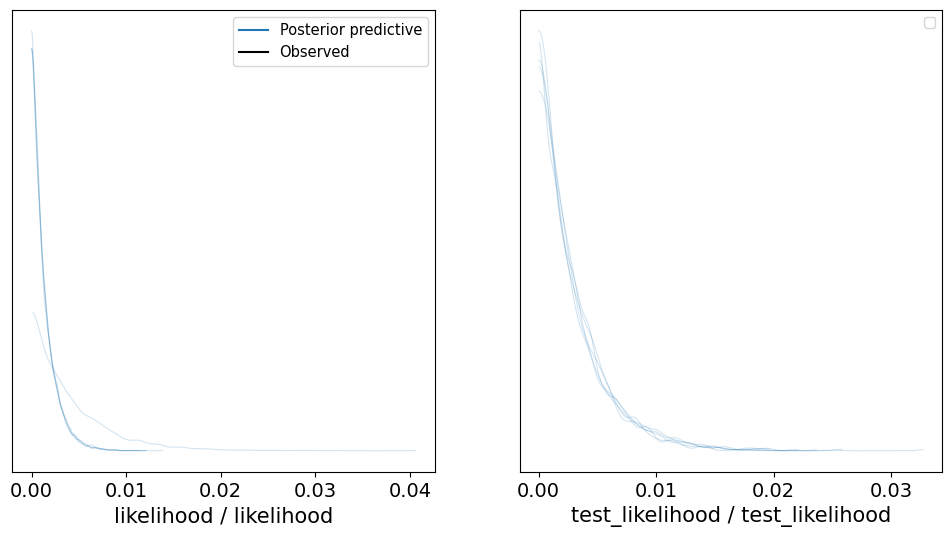

In [89]:
import pymc3 as pm
import arviz as az
import numpy as np
import theano.tensor as tt

test_data['booking_status'] = (test_data['booking_status'] == 'Canceled').astype(int)

# Calculate the mean outside the model context
rate_posterior_mean = trace['rate'].mean(axis=0)

# Make predictions on the test data using the trained model
with bayesian_model:
    # Create a deterministic variable using the computed mean
    rate_posterior = pm.Deterministic('rate_posterior', tt.as_tensor_variable(rate_posterior_mean))

    # Exponential likelihood for the test data
    test_likelihood = pm.Exponential('test_likelihood', lam=rate_posterior, observed=test_data['booking_status'])

    # Sample from the posterior distribution for the test likelihood
    test_trace = pm.sample_posterior_predictive(trace, samples=5)

az.plot_ppc(az.from_pymc3(trace, posterior_predictive=test_trace), figsize=(12, 6), mean=False)
